In [1]:
import cv2
image = cv2.imread('./assets/frame.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [17]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="./checkpoints/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
masks_ = mask_generator.generate(image)

In [18]:
masks = masks_

In [3]:
import numpy as np
np.random.random(3)

array([0.72914317, 0.56952683, 0.17752611])

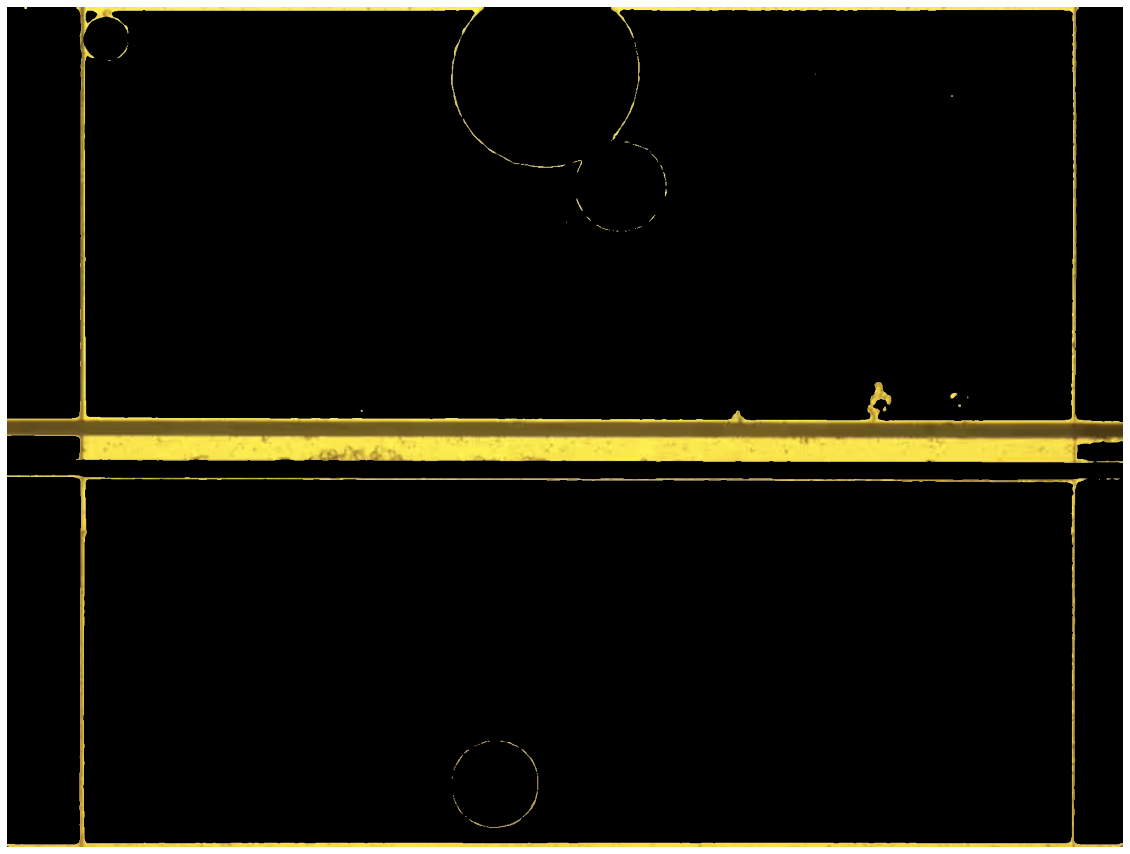

In [12]:
import numpy as np
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([[0.,0.,0.], [1.]])
        img[m] = color_mask
    ax.imshow(img)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [19]:
for mask in masks:
    print(mask['bbox'], end=', ')
len(masks)

[130, 805, 1691, 622], [761, 0, 364, 382], [0, 0, 127, 1427], [132, 4, 1689, 702], [760, 1253, 145, 146], [1822, 0, 83, 1429], [0, 0, 126, 702], [0, 802, 125, 627], [1825, 0, 80, 707], [1754, 136, 51, 75], [134, 3, 1687, 1416], [0, 772, 1905, 35], [0, 731, 124, 41], [1574, 545, 33, 37], [1823, 747, 82, 682], [1020, 626, 41, 30], [762, 0, 315, 270], [1137, 897, 169, 122], [130, 16, 76, 75], [1712, 910, 100, 132], [463, 903, 52, 31], [203, 805, 65, 86], [972, 233, 150, 147], [1610, 1001, 38, 23], [1252, 579, 45, 30], [1494, 893, 49, 49], [1403, 609, 49, 44], [1523, 189, 52, 69], [1796, 860, 23, 31], [1578, 25, 23, 33], 

30

(130, 805, 1821, 1427)
(761, 0, 1125, 382)
(0, 0, 127, 1427)
(132, 4, 1821, 706)
(760, 1253, 905, 1399)
(1822, 0, 1905, 1429)
(0, 0, 126, 702)
(0, 802, 125, 1429)
(1825, 0, 1905, 707)
(1754, 136, 1805, 211)
(134, 3, 1821, 1419)
(0, 772, 1905, 807)
(0, 731, 124, 772)
(1574, 545, 1607, 582)
(1823, 747, 1905, 1429)
(1020, 626, 1061, 656)
(762, 0, 1077, 270)
(1137, 897, 1306, 1019)
(130, 16, 206, 91)
(1712, 910, 1812, 1042)
(463, 903, 515, 934)
(203, 805, 268, 891)
(972, 233, 1122, 380)
(1610, 1001, 1648, 1024)
(1252, 579, 1297, 609)
(1494, 893, 1543, 942)
(1403, 609, 1452, 653)
(1523, 189, 1575, 258)
(1796, 860, 1819, 891)
(1578, 25, 1601, 58)


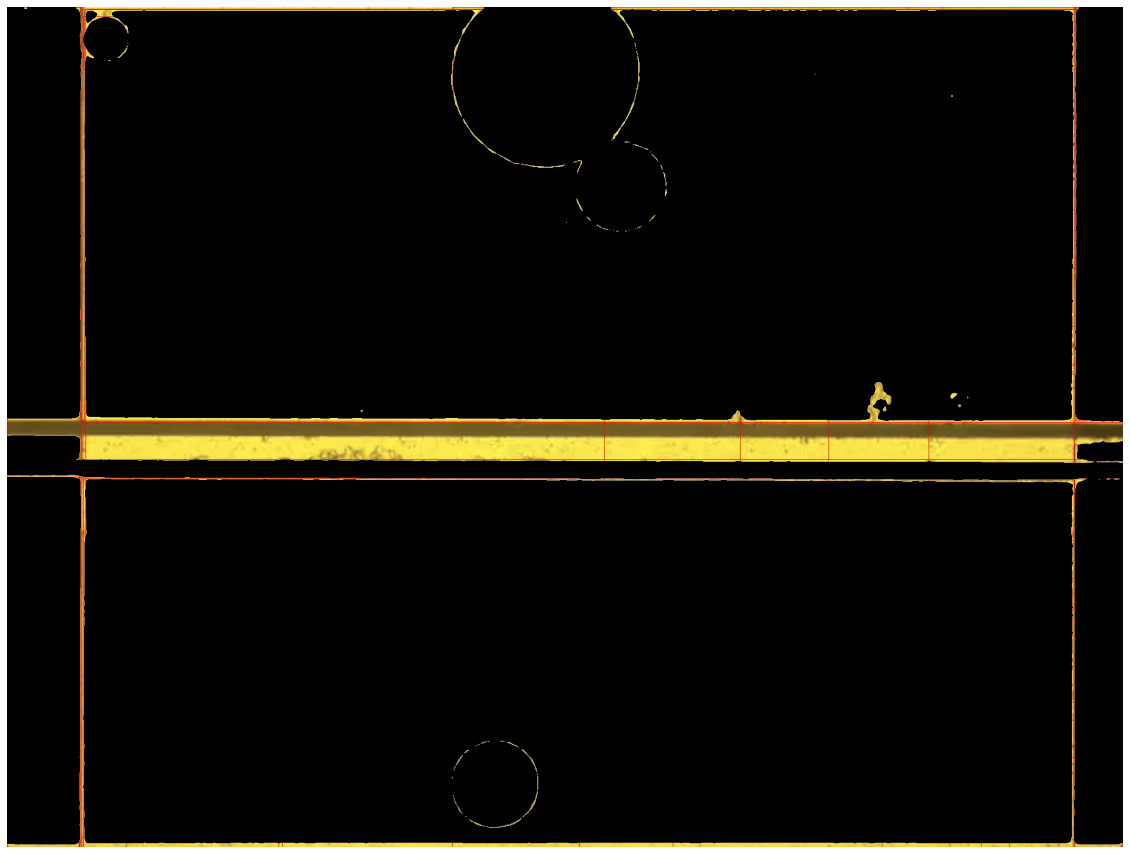

In [28]:
ori_image = cv2.imread('./assets/frame.jpg')
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_RGB2BGR)
masks = masks_
color = (255, 0, 0) 
for mask in masks:
    box = mask['bbox']
    assert len(box) == 4, len(box)
    box = (box[0], box[1], box[2]+box[0], box[3]+box[1])
    print(box)
    cv2.rectangle(ori_image, box, color)

plt.figure(figsize=(20,20))
plt.imshow(ori_image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [7]:
x = np.arange(24).reshape(3,2,4)
x.shape

(3, 2, 4)

In [8]:
idx_list = [1,2]
y = np.delete(x, idx_list, axis=0)
y.shape

(1, 2, 4)

In [10]:
u = [mask['bbox'] for mask in masks]
len(u), len(u[0])

(30, 4)

In [12]:
uu = np.array([u])
uu.shape

(1, 30, 4)

In [ ]:
image = cv2.imread('./assets/frame.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()